In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import json

from app_store_scraper import AppStore

In [108]:
brilliant = AppStore(country='us', app_name='brilliant', app_id = '913335252')

2023-04-11 08:58:55,022 [INFO] Base - Initialised: AppStore('us', 'brilliant', 913335252)
2023-04-11 08:58:55,024 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/brilliant/id913335252


In [109]:
brilliant.review(how_many=10000)

2023-04-11 08:59:03,021 [INFO] Base - [id:913335252] Fetched 260 reviews (260 fetched in total)
2023-04-11 08:59:08,586 [INFO] Base - [id:913335252] Fetched 620 reviews (620 fetched in total)
2023-04-11 08:59:13,992 [INFO] Base - [id:913335252] Fetched 940 reviews (940 fetched in total)
2023-04-11 08:59:19,317 [INFO] Base - [id:913335252] Fetched 1240 reviews (1240 fetched in total)
2023-04-11 08:59:24,980 [INFO] Base - [id:913335252] Fetched 1560 reviews (1560 fetched in total)
2023-04-11 08:59:30,396 [INFO] Base - [id:913335252] Fetched 1860 reviews (1860 fetched in total)
2023-04-11 08:59:36,040 [INFO] Base - [id:913335252] Fetched 2160 reviews (2160 fetched in total)
2023-04-11 08:59:41,530 [INFO] Base - [id:913335252] Fetched 2440 reviews (2440 fetched in total)
2023-04-11 08:59:45,101 [INFO] Base - [id:913335252] Fetched 2627 reviews (2627 fetched in total)


In [131]:
brilliantdata = copy.deepcopy(brilliant.reviews)
brilliantdf = pd.DataFrame(np.array(brilliantdata),columns=['review'])
brilliantdata = pd.DataFrame(brilliantdf.pop('review').tolist())

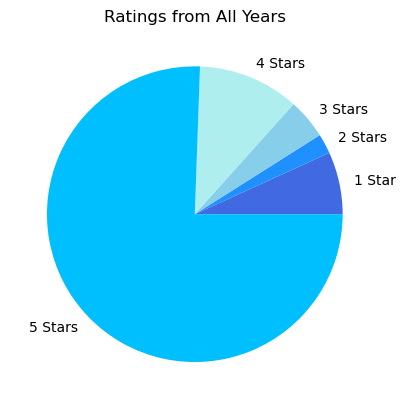

In [209]:
percOf1 = sum(brilliantdata['rating'] == 1)/len(brilliantdata)
percOf2 = sum(brilliantdata['rating'] == 2)/len(brilliantdata)
percOf3 = sum(brilliantdata['rating'] == 3)/len(brilliantdata)
percOf4 = sum(brilliantdata['rating'] == 4)/len(brilliantdata)
percOf5 = sum(brilliantdata['rating'] == 5)/len(brilliantdata)
labels = '1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'
sizes = [percOf1, percOf2, percOf3, percOf4, percOf5]
fig, ax = plt.subplots()
colors = ['deepskyblue','paleturquoise','skyblue','dodgerblue','royalblue']
colors.reverse()
plt.title("Ratings from All Years")
allratings = ax.pie(sizes, labels=labels, colors = colors)

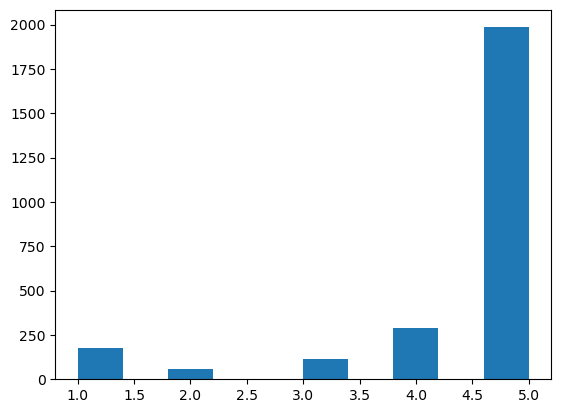

In [138]:
allratinghist = plt.hist(brilliantdata['rating'])

In [156]:
brilliantdata = brilliantdata.sort_values(by='date')
brilliantdata = brilliantdata.reset_index()
brilliantdata = brilliantdata.drop('index',axis=1)

In [197]:
years = []
indices = []
for i in range(2015,2024):
    years.append(i)
    indices.append(i)
for i in range(brilliantdata.shape[0]):
    for j in range(len(years)):
        if (int(str(brilliantdata['date'][i])[:4])) == years[j]:
            if (indices[j] == years[j]):
                indices[j] = i   

In [205]:
year2015 = brilliantdata.iloc[0:indices[1]-1]
year2016 = brilliantdata.iloc[indices[1]:indices[2]-1]
year2017 = brilliantdata.iloc[indices[2]:indices[3]-1]
year2018 = brilliantdata.iloc[indices[3]:indices[4]-1]
year2019 = brilliantdata.iloc[indices[4]:indices[5]-1]
year2020 = brilliantdata.iloc[indices[5]:indices[6]-1]
year2021 = brilliantdata.iloc[indices[6]:indices[7]-1]
year2022 = brilliantdata.iloc[indices[7]:indices[8]-1]
year2023 = brilliantdata.iloc[indices[8]:]

In [218]:
def drawPieChart(data, year):
    percOf1 = sum(data['rating'] == 1)/len(data)
    percOf2 = sum(data['rating'] == 2)/len(data)
    percOf3 = sum(data['rating'] == 3)/len(data)
    percOf4 = sum(data['rating'] == 4)/len(data)
    percOf5 = sum(data['rating'] == 5)/len(data)
    labels = '1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'
    sizes = [percOf1, percOf2, percOf3, percOf4, percOf5]
    fig, ax = plt.subplots()
    colors = ['deepskyblue','paleturquoise','skyblue','dodgerblue','royalblue']
    colors.reverse()
    plt.title("Ratings from " + str(year))
    allratings = ax.pie(sizes, labels=labels, colors = colors)

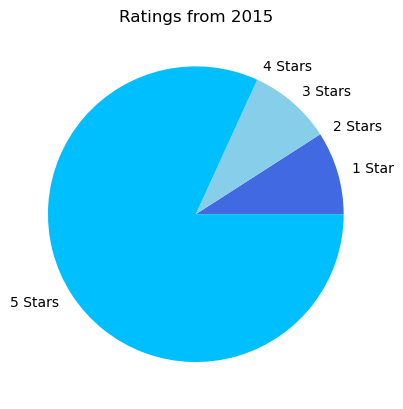

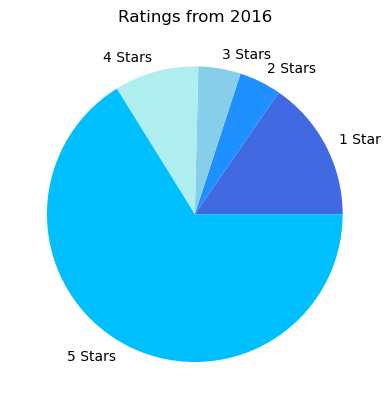

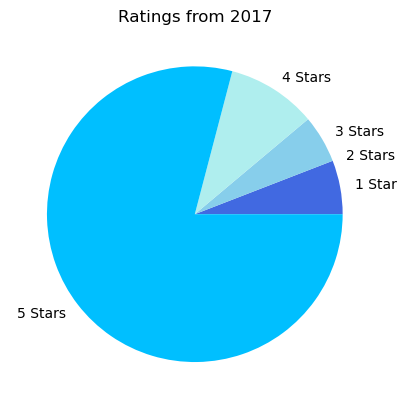

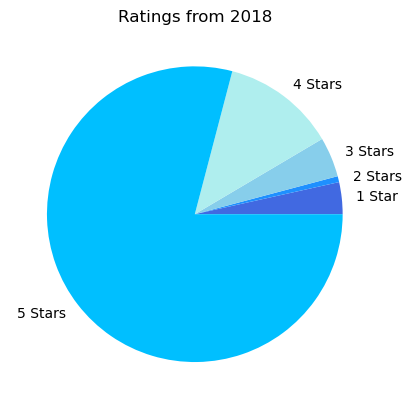

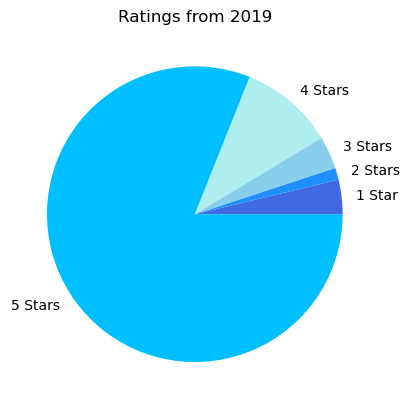

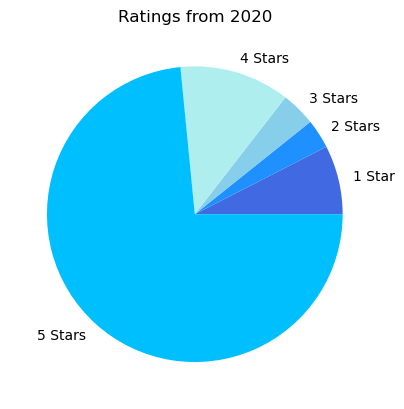

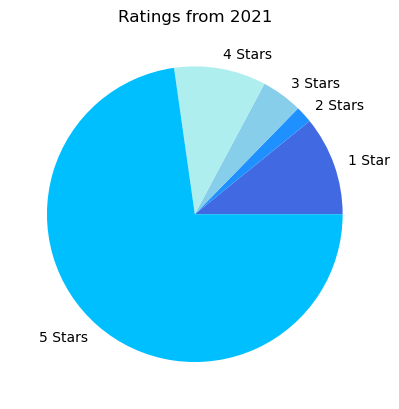

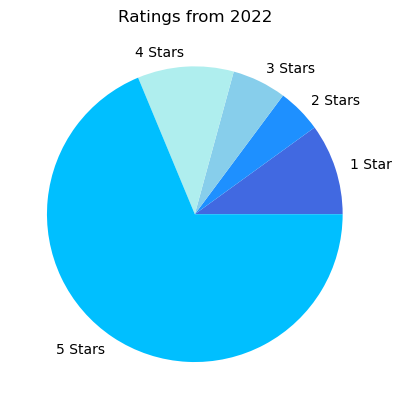

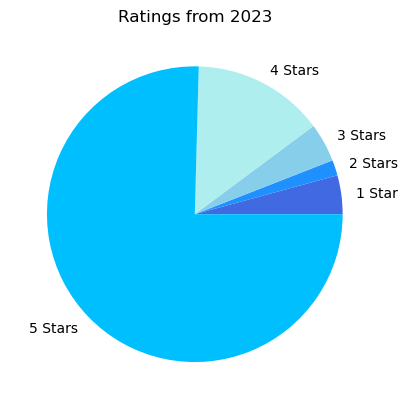

In [219]:
drawPieChart(year2015, 2015)
drawPieChart(year2016, 2016)
drawPieChart(year2017, 2017)
drawPieChart(year2018, 2018)
drawPieChart(year2019, 2019)
drawPieChart(year2020, 2020)
drawPieChart(year2021, 2021)
drawPieChart(year2022, 2022)
drawPieChart(year2023, 2023)